# Problem 1

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Download the the file facebook combined.txt.gz from
<a href="https://snap.stanford.edu/data/egonets-Facebook.html">https://snap.stanford.edu/data/egonets-Facebook.html</a>.

In [3]:
G = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph())

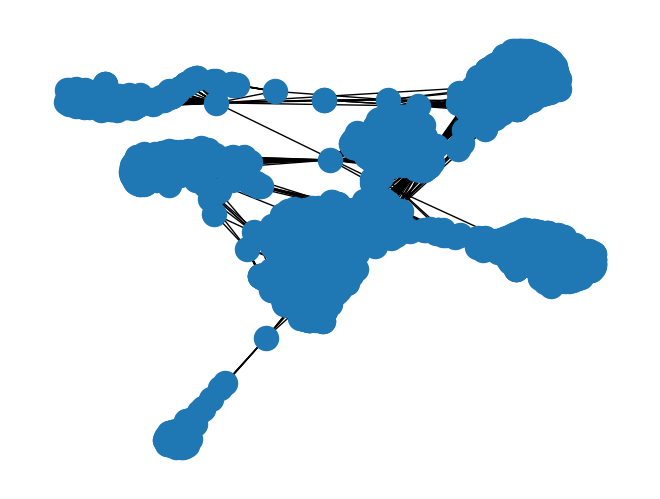

In [4]:
nx.draw(G)

In [9]:
A = nx.adjacency_matrix(G)
a = A.todense()

/var/folders/yv/0wjzc10d30z52y56qczm8s5c0000gp/T/ipykernel_82275/472418378.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [15]:
# build the pagerank matrix
n,k = np.shape(a)
d = [np.sum(a[i]) for i in range(n)]
c = np.array([[1/d[j]* a[j, i] for j in range(n)] for i in range(n)])

In [16]:
# output an approximation for the eigenvalue and eigenvector 
def powermethod(A, v, n): 
    w=(1/np.linalg.norm(v))*v
    for k in range(n):
        v = A @ w
        l = np.dot(v,w)
        w=(1/np.linalg.norm(v))*v
    return l,w

In [17]:
v0 = np.random.rand(n)

In [51]:
l,v = powermethod(c,v0,20000) ## running this for 20,000 iterations which will take a few seconds (about a minute on my machine)
# the principle eigenvalue should be 1
print(l)

1.0000000000026834


## Here are the pageranks

In [52]:
print(v)

[0.08001646 0.00392011 0.00230595 ... 0.00046119 0.00092238 0.00207535]


In [53]:
r = max(v)
p = np.argmax(v)
print(r,p)

0.24097176520641614 107


Person 107 has the highest pagerank of 0.24.  How many friends does this person have?

In [54]:
d[107]

1045

Here is the list of pageranks for the 50 most popular people:

In [56]:
paired_ranks = [(v[i],i) for i in range(n)]
sorted(paired_ranks,reverse=True)[:10]

[(0.24097176520641614, 107),
 (0.18263123266121395, 351),
 (0.17409921628117503, 352),
 (0.1261354632618871, 1821),
 (0.08001646117261692, 0),
 (0.0677949265995808, 1490),
 (0.06710314163125623, 2154),
 (0.05857112760374685, 1373),
 (0.0564957726888205, 1285),
 (0.054189822781336626, 1149)]

In [60]:
from tabulate import tabulate
data = sorted(paired_ranks,reverse=True)[:50]
print(tabulate(data, headers=["Rank", "Person"], tablefmt='fancy_grid',floatfmt=".4f"))

╒════════╤══════════╕
│   Rank │   Person │
╞════════╪══════════╡
│ 0.2410 │      107 │
├────────┼──────────┤
│ 0.1826 │      351 │
├────────┼──────────┤
│ 0.1741 │      352 │
├────────┼──────────┤
│ 0.1261 │     1821 │
├────────┼──────────┤
│ 0.0800 │        0 │
├────────┼──────────┤
│ 0.0678 │     1490 │
├────────┼──────────┤
│ 0.0671 │     2154 │
├────────┼──────────┤
│ 0.0586 │     1373 │
├────────┼──────────┤
│ 0.0565 │     1285 │
├────────┼──────────┤
│ 0.0542 │     1149 │
├────────┼──────────┤
│ 0.0540 │      838 │
├────────┼──────────┤
│ 0.0540 │     2145 │
├────────┼──────────┤
│ 0.0533 │      366 │
├────────┼──────────┤
│ 0.0528 │      348 │
├────────┼──────────┤
│ 0.0521 │     1215 │
├────────┼──────────┤
│ 0.0517 │     2995 │
├────────┼──────────┤
│ 0.0514 │     2126 │
├────────┼──────────┤
│ 0.0512 │     3169 │
├────────┼──────────┤
│ 0.0510 │     3106 │
├────────┼──────────┤
│ 0.0507 │      917 │
├────────┼──────────┤
│ 0.0500 │      685 │
├────────┼──────────┤
│ 0.0487 │

We can draw a better friend graph by coloring and sizing the nodes according to pageranks.

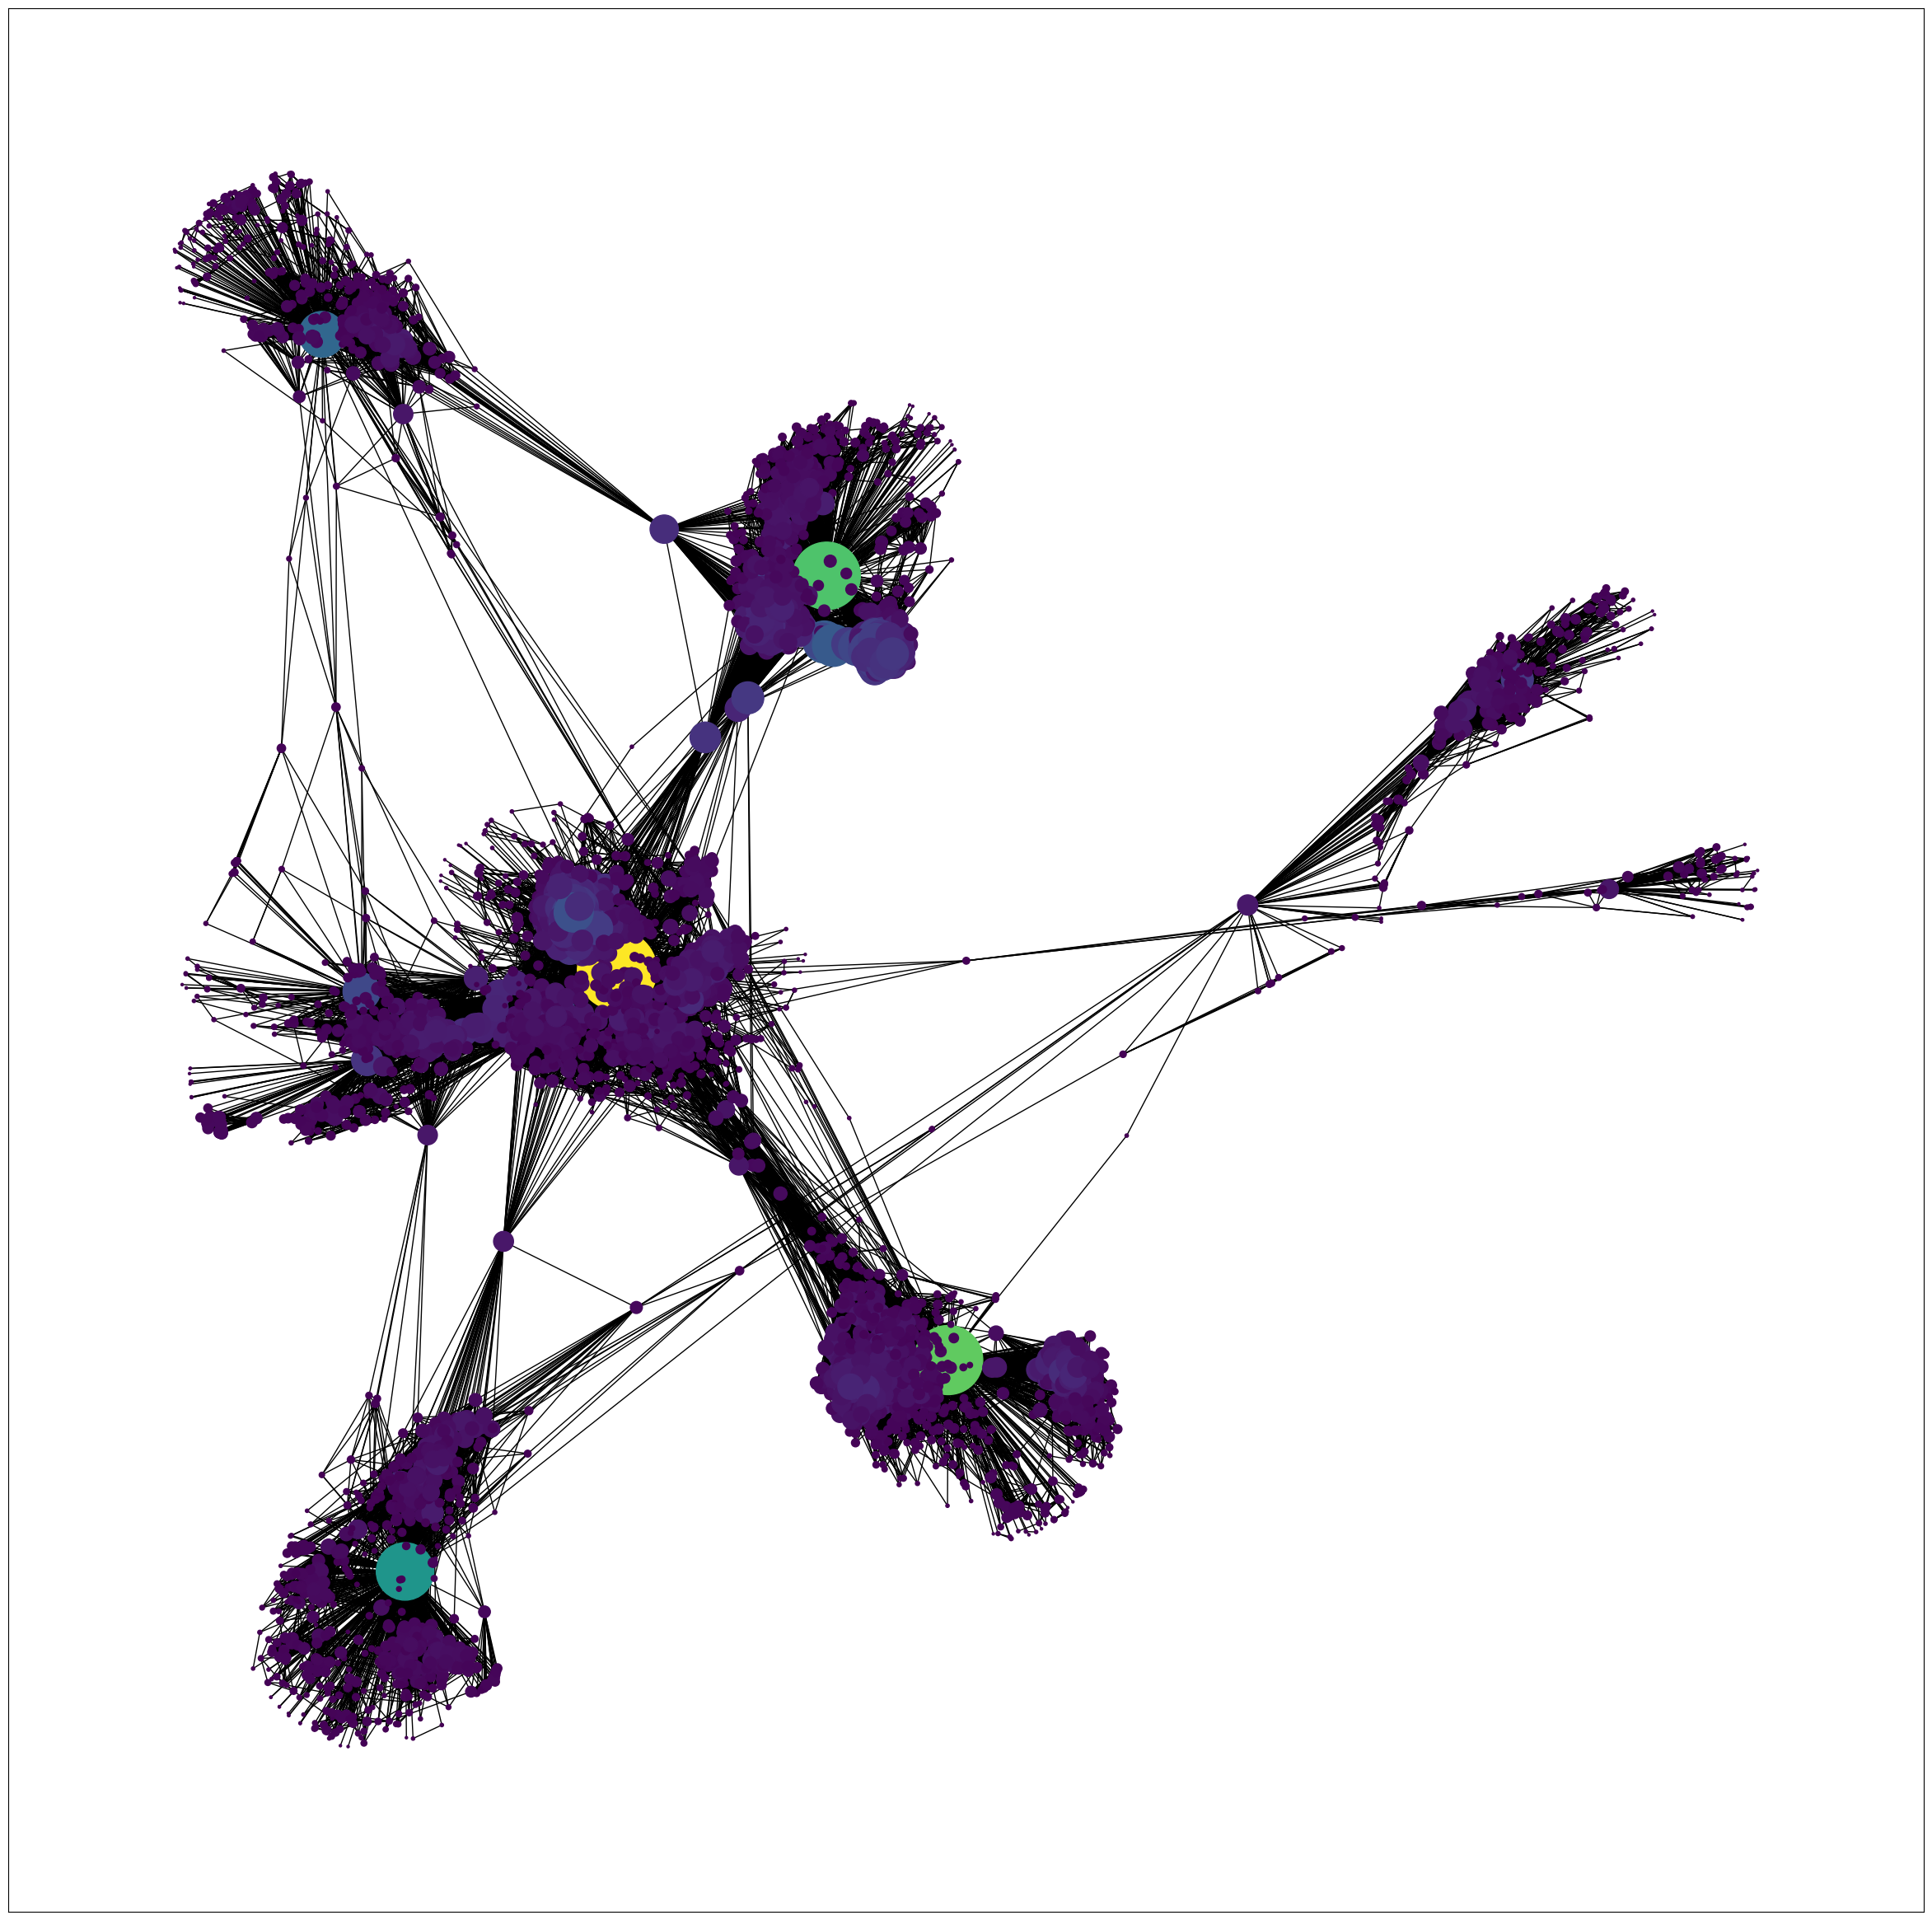

In [30]:
pos = nx.spring_layout(G_fb)
pr_colors = [20000 * val for val in v]
pr_sizes =  [20000*val for val  in v]
plt.figure(figsize=(30,30))
nx.draw_networkx(G_fb, pos=pos, with_labels=False, node_color=pr_colors, node_size=pr_sizes)

## An interesting footnote
In January of this year, Scientific American published an article <a href="https://www.scientificamerican.com/article/math-explains-why-your-friends-are-more-popular-than-you/">Math Explains Why Your Friends Are More Popular Than You</a>.  You can read the article for an explanation --- it's quite simple and interesting.  Here, let's look empirically using the data we have.

The number of $1$'s in row $i$ of our adjacency matrix $d[i] = \sum_{j=1}^n a[i,j]$ is the number of friends person $i$ has.

In [75]:
list1 = [d[i] for i in range(n) if a[1,i]==1]
print("Person 1 has", d[1], "friends, and here's how many friends they have", list1)
print("On average, the 17 friends of person 1 have", np.average(list1), "friends")

Person 1 has 17 friends, and here's how many friends they have [347, 22, 31, 8, 10, 20, 21, 62, 7, 18, 19, 37, 43, 20, 56, 72, 27]
On average, the 17 friends of person 1 have 48.23529411764706 friends


On average, the friends of person 1 have more friends that person 1 has.  Let's look at more people.

In [76]:
friendcounts = [[d[i] for i in range(n) if a[j,i]==1] for j in range(n)]


In [85]:
print(friendcounts[1])
print(friendcounts[2])
print(friendcounts[3])

[347, 22, 31, 8, 10, 20, 21, 62, 7, 18, 19, 37, 43, 20, 56, 72, 27]
[347, 15, 21, 17, 14, 14, 26, 19, 8, 18]
[347, 57, 69, 68, 76, 24, 14, 63, 43, 46, 48, 57, 3, 14, 43, 5, 39]


In [89]:
collected_friend_counts = [(i,d[i],np.average(friendcounts[i])) for i in range(n)]
print(tabulate(collected_friend_counts, 
               headers=["Person", "Number of Friends", "Avg number of friends their friends have"], 
               tablefmt='fancy_grid',floatfmt=".4f"))

╒══════════╤═════════════════════╤════════════════════════════════════════════╕
│   Person │   Number of Friends │   Avg number of friends their friends have │
╞══════════╪═════════════════════╪════════════════════════════════════════════╡
│        0 │            347.0000 │                                    18.9597 │
├──────────┼─────────────────────┼────────────────────────────────────────────┤
│        1 │             17.0000 │                                    48.2353 │
├──────────┼─────────────────────┼────────────────────────────────────────────┤
│        2 │             10.0000 │                                    49.9000 │
├──────────┼─────────────────────┼────────────────────────────────────────────┤
│        3 │             17.0000 │                                    59.7647 │
├──────────┼─────────────────────┼────────────────────────────────────────────┤
│        4 │             10.0000 │                                    42.6000 │
├──────────┼─────────────────────┼──────

Some people (like person 0 who has 347 friends) have more friends than their friends have on average, but most seem to have fewer friends than their friends have.  Let's count:

In [90]:
sum(1 for i,j,k in collected_friend_counts if j>k) # people that have more friends than their friends have on average

506

In [93]:
sum(1 for i,j,k in collected_friend_counts if k>j) # people that have fewer friends than their friends have on avergae

3533

## So, most people have fewer friends than their friend have on average, as predicted by the Scientific American article